## Recognize Hand Written Digit ##
This is my exercise from the **Machine Learning for 3QI** course at HvN

This project, I applied *k-mean* for the recognization the hand writen digit

Issue: _IOPub data rate exceeded. The notebook server will temporarily stop sending output to the client in order to avoid crashing it. To change this limit, set the config variable `--NotebookApp.iopub_data_rate_limit`. Current values: NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)_

Solution: Run jupyter with command: _jupyter notebook --NotebookApp.iopub_data_rate_limit=100000000_

In [1]:
#Import
import os
from sklearn.cluster import KMeans
from sklearn import tree
from sklearn import linear_model
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier
import numpy as np
import pandas as pd
import random
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Check data folder
print(os.listdir('../data/Hvn'))

['data', 'data.zip', 'faces', 'faces_full', 'testDigits', 'testDigits.zip', 'trainingDigits', 'trainingDigits.zip', '__MACOSX']


In [3]:
#Parameters
input_test_path = '../data/HvN/testDigits/'
input_train_path = '../data/HvN/trainingDigits/'
IMG_WIDTH = 32
IMG_HEIGHT = 32
K_CLUSTERS = 10
MAX_ITER = 1000000
N_INIT = 10

In [4]:
#Process one file
def process_file(file_name):
    ret_arr = []
    with open(file_name, 'r') as f:      
        for line in f: 
            line = line.strip()
            line = line.replace('\n', '')
            line = line.replace('\r', '')
            arr = []
            i=0
            for i in range(len(line)):
                v = int(line[i])
                arr.append(v)
            ret_arr.extend(arr)
    return ret_arr

In [5]:
#Process folder
def process_folder(folder_path):
    matrixX=None
    matrixY=None
    matrixX_arr = []
    matrixY_arr = []
    for root, dirs, files in os.walk(folder_path):
        random.shuffle(files,random.random) #Shuffle data, but accuracy still not change        
        for file in files:
            if file.endswith('.txt'):
                file_name = os.path.join(root, file)
                row_arr = process_file(file_name)
                matrixX_arr.append(np.array(row_arr))                
                label = int(file[0])
                matrixY_arr.append(label)
                
    matrixX=np.vstack(matrixX_arr)
#     matrixY=np.vstack(matrixY_arr)
    matrixY=np.array(matrixY_arr)
    return matrixX, matrixY

In [19]:
#Process folder
def process_folder_kmeans(folder_path):
    matrix = []
    for root, dirs, files in os.walk(folder_path):
        random.shuffle(files,random.random) #Shuffle data, but accuracy still not change        
        for file in files:
            if file.endswith('.txt'):
                file_name = os.path.join(root, file)
                row_arr = process_file(file_name)              
                label = int(file[0])
                
                matrix.append((label, row_arr))
                
    return matrix

In [6]:
X_train, Y_train = process_folder(input_train_path)
X_test, Y_test = process_folder(input_test_path)

In [20]:
digits = process_folder_kmeans(input_train_path)

In [21]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)
print(digits)

(1934, 1024)
(1934,)
(946, 1024)
(946,)
[(4, [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

1. kmeans_init_centers để khởi tạo các centers ban đầu.
2. kmeans_asign_labels để gán nhán mới cho các điểm khi biết các centers.
3. kmeans_update_centers để cập nhật các centers mới dữa trên dữ liệu vừa được gán nhãn.
4. has_converged để kiểm tra điều kiện dừng của thuật toán.

In [76]:
def init_centroids(labelled_data, k):
    return list(map(lambda x: x[1], random.sample(labelled_data, k)))

In [230]:
a = init_centroids(digits, 10)
print(a)

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,

In [327]:
def sum_cluster(labelled_cluster):
    sum_ = np.array(labelled_cluster[0][1])[1]
    for(label, vector) in labelled_cluster[1:]:
        sum_+=np.array(vector)
    return sum_

In [346]:
#Calculate sum, then divide by the size of the cluster
def mean_cluster(labelled_cluster):
#     print(len(labelled_cluster))
#     sum_result = sum_cluster(labelled_cluster)
#     print(len(sum_result))
#     mean = sum_result * (1.0/len(labelled_cluster))
    print(np.array(labelled_cluster).shape)
    mean = np.mean(np.array(labelled_cluster), axis=1)
    return mean

In [347]:
def form_clusters(labelled_data, unlabelled_centroids):
    clusters = {c: [] for c in range(0, N_INIT)}
    print(clusters)
    closest_centroid_index = 0
    for(label, Xi) in labelled_data:
        min_distance = 0.0
        for cj_index in range(0, N_INIT):
            cj = unlabelled_centroids[cj_index]
            distance = np.linalg.norm(np.array(Xi)-np.array(cj))
            if distance < min_distance:
                closest_centroid_index = cj_index
                min_distance = distance
        
        clusters[closest_centroid_index].append((label, Xi))
    return clusters.values()

In [348]:
# list of centroids corresponding to the clusters.
def move_centroids(labelled_clusters):
    new_centroids = []
    for cluster in labelled_clusters:
        new_centroids.append(mean_cluster(cluster))
    return new_centroids

In [349]:
def repeat_until_convergence(labelled_data, labelled_clusters, unlabelled_centroids):
    previous_max_difference = 0
    while True:
        unlabelled_old_centroids = unlabelled_centroids
        unlabelled_centroids = move_centroids(labelled_clusters)
        labelled_clusters = form_clusters(labelled_data, unlabelled_centroids)
        
        differences = map(lambda a,b : np.linalg.norm(a-b), unlabelled_old_centroids, unlabelled_centroids)
        max_differences = max(differences)
        difference_change = abs((max_differences - previous_max_difference)/np.mean([previous_max_difference, max_differences])) * 100
        previous_max_difference = max_differences
        
        if np.isnan(difference_change):
            break
    return labelled_clusters, unlabelled_centroids

In [350]:
def cluster(labeled_data, k):
    centroids = init_centroids(labeled_data, k)
    clusters = form_clusters(labeled_data, centroids)

    final_clusters, final_centroids = repeat_until_convergence(labeled_data, clusters, centroids)
    return final_clusters, final_centroids

In [351]:
def assign_labels_to_centroids(clusters, centroids):
    labelled_centroids = []
    for i in range(len(clusters)):
        labels = map(lambda x: x[0], clusters[i])
        most_common = max(set(labels), key=labels.count)
        centroid - (most_common, centroids[i])
        labelled_centroids.append(centroid)
    return labelled_centroids

In [352]:
def classify_digit(digit, labelled_centroids):
    mindistance = float("inf")
    for(label, centroid) in labelled_centroids:
        distance = np.linalg.norm(centroid - digit)
        if distance < mindistance:
            mindistance = distance
            closet_centroid_label = label
    return closet_centroid_label

In [353]:
def count_accuracy_kmean(labelled_digits, labelled_centroids):
    count = 0
    for (label, digit) in labelled_digits:
        classified_label = classify_digit(digit, labelled_centroids)
        if classified_label == label:
            count += 1
    return count/float(len(list(digits)))
            

In [354]:
k = 10
trained_clusters, trained_centroids = cluster(digits, k)
# labelled_centroids = assign_labels_to_centroids(trained_clusters, trained_centroids)

{0: [], 1: [], 2: [], 3: [], 4: [], 5: [], 6: [], 7: [], 8: [], 9: []}


ValueError: setting an array element with a sequence.

In [ ]:
def digit_written_k_means(estimator, name, X, Y):    
    estimator.fit(X)
    labels = Y
    pre_labels = estimator.labels_    
    print('%-9s\t%i\t%.3f\t\t%.3f'
          % (name, estimator.inertia_,
             metrics.v_measure_score(labels, pre_labels),
             (metrics.accuracy_score(labels, pre_labels))*100))
    return estimator

In [9]:
print('Algorithm_name\tinertia\tv_measure_score\taccuracy_score(%)')
kmeans1 = digit_written_k_means(KMeans(init='k-means++', n_clusters=K_CLUSTERS, n_init=N_INIT, max_iter=MAX_ITER),
              name="k-means++", X=X_train, Y=Y_train)

kmeans2 = digit_written_k_means(KMeans(init='random', n_clusters=K_CLUSTERS, n_init=N_INIT, max_iter=MAX_ITER),
              name="random", X=X_train, Y=Y_train)

pca = PCA(n_components=K_CLUSTERS).fit(X_train)
kmeans3 = digit_written_k_means(KMeans(init=pca.components_, n_clusters=K_CLUSTERS, n_init=1, max_iter=MAX_ITER),
              name="PCA-based", X=X_train, Y=Y_train)


Algorithm_name	inertia	v_measure_score	accuracy_score(%)
k-means++	177985	0.763		7.187
random   	177645	0.739		2.844
PCA-based	177853	0.765		21.975


In [10]:
def knn(X, X_train, Y_train, k=1):
    inXMat = np.tile(X, (len(Y_train),1))
    deltaXMat = inXMat - X_train
    sqDiffMat = deltaXMat**2
    sqDistances = sqDiffMat.sum(axis=1)
    sqrt = sqDistances**0.5
    sqrtIndex =[]
    for i, v in enumerate(sqrt):
        a = {}
        a['id'] = i
        a['val'] = v
        sqrtIndex.append(a)
    sqrtSort = sorted(sqrtIndex,key= lambda x: x['val'])
    sqrtSortK = sqrtSort[:k]
    for a in sqrtSortK:
        label = Y_train[a['id']]
    return label

In [11]:
def accuracy_knn(X_test, Y_test, X_train, Y_train):
    sum =0
    for i, test in enumerate(X_test):
        l = knn(test, X_train, Y_train)
        if l == Y_test[i]:
            sum += 1
    return sum, 100*(sum/len(Y_test))

In [12]:
#Decision Tree
decision_tree = tree.DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [13]:
#Logistic
logistic = linear_model.LogisticRegression()
logistic.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [14]:
#Multi layers perception
MLP = MLPClassifier(solver='lbfgs', alpha=1e-5,
                     hidden_layer_sizes=(5, 10), random_state=1)
MLP.fit(X_test, Y_test)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(5, 10), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [15]:
def show_number(arr):
    for i in range(len(arr)):
        if i%32==0:
            print("\n\t")
        print(arr[i], end='', flush=True)

In [16]:
#Get Y
index = 1
Y= X_test[index,:]
show_number(Y)
Y=Y.reshape(1,IMG_WIDTH*IMG_HEIGHT)
print('\n\n label: {0}'.format(Y_test[index]))


	
00000000000000000000000000000000
	
00000000000011111000000000000000
	
00000000000111111110000000000000
	
00000000000111111110000000000000
	
00000000001111111110000000000000
	
00000000011111111000000000000000
	
00000000011111111000000000000000
	
00000000011111110000000000000000
	
00000000111111000000000000000000
	
00000000111111100000000000000000
	
00000000111111000000000000000000
	
00000000111111000000000000000000
	
00000000011111100000000000000000
	
00000000111111000000000000000000
	
00000000111111000000000000000000
	
00000000111111111111111000000000
	
00000000111111111111111100000000
	
00000000111111111111111100000000
	
00000000111111111111111111100000
	
00000000111111111111111111100000
	
00000000111111110000011111100000
	
00000000011111110000001111110000
	
00000000111111000000001111110000
	
00000000111111100000011111100000
	
00000000011111111000111111100000
	
00000000011111110001111111100000
	
00000000011111100011111111100000
	
00000000001111111111111111000000
	
00000000000111111

In [17]:
#Predict
pred_label_kmean1 = kmeans1.predict(X_test) 
pred_label_kmean2 = kmeans2.predict(X_test) 
pred_label_kmean3 = kmeans3.predict(X_test) 

In [18]:
print(pred_label_kmean1[index])
print(pred_label_kmean2[index])
print(pred_label_kmean3[index])

5
5
0


In [19]:
def count_accuracy(estimator, Xdata, Ydata):    
    pred_labels = estimator.predict(Xdata)  
    acc = (metrics.accuracy_score(Ydata, pred_labels))*100
    count = 0
    for i, y in enumerate(Ydata):
        if y == pred_labels[i]:
            count = count + 1
        
    return count, acc

In [20]:
#Calculate 
count1, acc1 = count_accuracy(kmeans1, X_test, Y_test)
count2, acc2 = count_accuracy(kmeans2, X_test, Y_test)
count3, acc3 = count_accuracy(kmeans3, X_test, Y_test)
count4, acc4 = accuracy_knn(X_test, Y_test, X_train, Y_train)
count5, acc5 = count_accuracy(decision_tree, X_test, Y_test)
count6, acc6 = count_accuracy(logistic, X_test, Y_test)
count7, acc7 = count_accuracy(MLP, X_test, Y_test)


In [21]:
MLs = []
MLs.append({'name': 'k-means++', 'sum':count1, 'acc':acc1})
MLs.append({'name': 'k-means-random', 'sum':count2, 'acc':acc2})
MLs.append({'name': 'k-means-PCA-based', 'sum':count3, 'acc':acc3})
MLs.append({'name': 'K-NN', 'sum':count4, 'acc':acc4})
MLs.append({'name': 'Decision tree', 'sum':count5, 'acc':acc5})
MLs.append({'name': 'Logistic', 'sum':count6, 'acc':acc6})
MLs.append({'name': 'Multi layers perception', 'sum':count7, 'acc':acc7})

In [22]:
print('Kmean1: {0} - acuracy: {1}'.format(count1, acc1))
print('Kmean2: {0} - acuracy: {1}'.format(count2, acc2))
print('Kmean3: {0} - acuracy: {1}'.format(count3, acc3))
print('K-NN: {0} - acuracy: {1}'.format(count4, acc4))
print('Decision Tree: {0} - acuracy: {1}'.format(count5, acc5))
print('Logistic: {0} - acuracy: {1}'.format(count6, acc6))
print('Multi layers perception: {0} - acuracy: {1}'.format(count7, acc7))

Kmean1: 60 - acuracy: 6.342494714587738
Kmean2: 32 - acuracy: 3.382663847780127
Kmean3: 176 - acuracy: 18.6046511627907
K-NN: 934 - acuracy: 98.73150105708245
Decision Tree: 829 - acuracy: 87.63213530655392
Logistic: 914 - acuracy: 96.61733615221986
Multi layers perception: 945 - acuracy: 99.89429175475686


Text(0,0.5,'Algorithm')

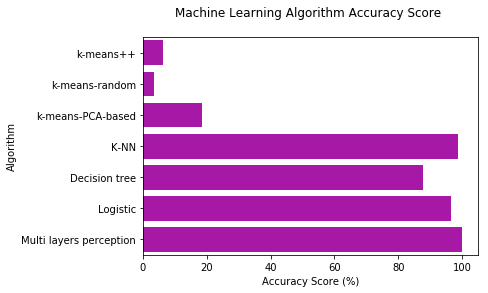

In [23]:
#Bar plot ML algorithms:
ML_columns = ['Name', 'Sum Correct', 'Accuracy']
ML_compare = pd.DataFrame(columns = ML_columns)

row_index = 0
for alg in MLs:
    ML_compare.loc[row_index, 'Name'] = alg['name']
    ML_compare.loc[row_index, 'Sum Correct'] = alg['sum']
    ML_compare.loc[row_index, 'Accuracy'] = alg['acc']    
    row_index+=1

sns.barplot(x='Accuracy', y = 'Name', data = ML_compare, color = 'm')

plt.title('Machine Learning Algorithm Accuracy Score \n')
plt.xlabel('Accuracy Score (%)')
plt.ylabel('Algorithm')